1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import pandas as pd

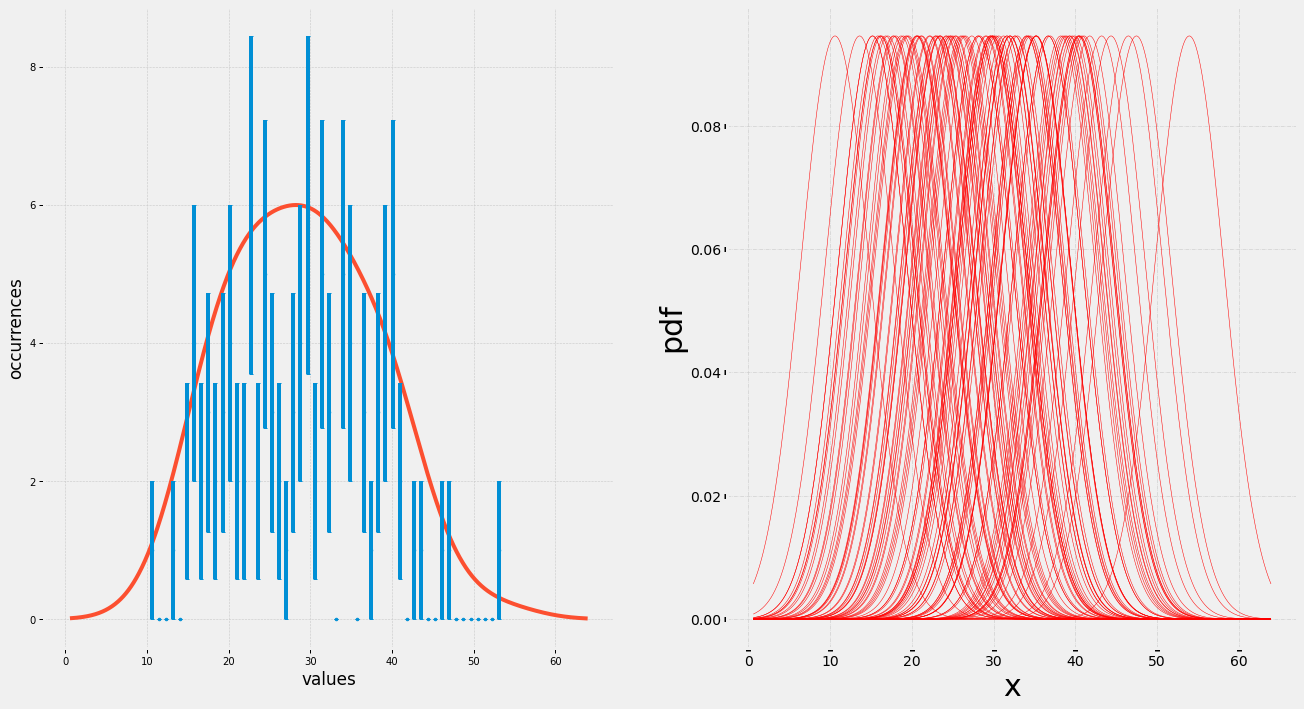

In [42]:
N=100; mean=30; std=10;
x=np.random.randn(N,1)*std+mean 

fig = plt.figure(figsize=(20, 11))


ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(linestyle="--",linewidth=0.6,zorder=-10);
ax1.set_xlabel('values');
ax1.set_ylabel('occurrences');
ax1.tick_params(which='major',width=1.0, length=5,labelsize=10);
ax1.tick_params(which='minor', width=1.0, length=5, labelsize=10);




H,binedges=np.histogram(x,N//2);
error=np.sqrt(H); 



ax1.errorbar(binedges[0:len(binedges)-1],H, error, fmt='.', markersize=5, capsize=2, zorder=10);
ax2 = fig.add_subplot(1, 2, 2);
ax2.grid(linestyle="-.", linewidth=0.6, zorder=-10);
ax2.set_xlabel('x',size = 30, color = 'k');
ax2.set_ylabel('pdf',size =30, color = 'k');
ax2.tick_params(which='major',width=5.0,length=3,labelsize=14);
ax2.tick_params(which='minor', width=1.0, length=5, labelsize=10); 


std_default=1.06*std*x.size**(-1/5); 

std_tuned=std_default; 

N_KDE=1000; 
x_vals=np.linspace(binedges[0]-std, binedges[-1]+std, N_KDE) 

KDE=np.zeros((N_KDE,));
for mean in x: 
    ax2.plot(x_vals, sp.stats.norm(mean, std_tuned).pdf(x_vals), 'r', linewidth=0.5, zorder=10); 
    KDE+=sp.stats.norm(mean, std_tuned).pdf(x_vals); 
    
KDE=KDE/max(KDE)*max(H) 

ax1.plot(x_vals, KDE); 



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

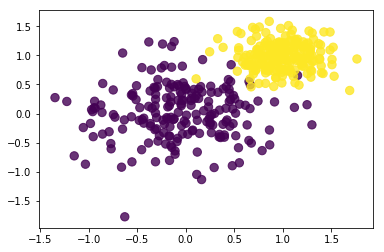

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

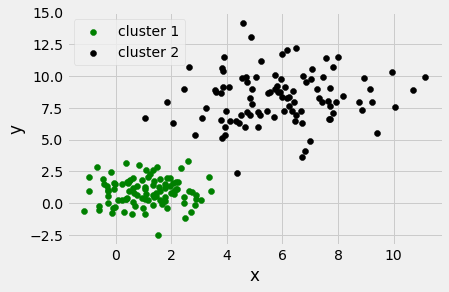

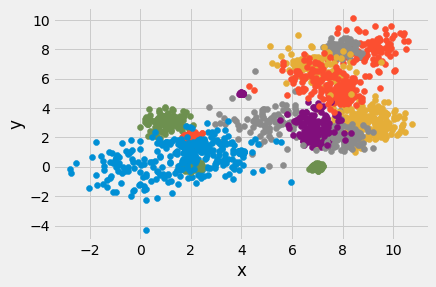

In [31]:


sigma1, sigma2 = 1,2
center1 = (1,1)                                                                                    
center2 = (3,4) 


points = np.random.normal(size=(100,4))


points[:,0] += center1[0]
points[:,1] += center1[1]
points[:,2] += center2[0]
points[:,3] += center2[1]
points[:,:2] *= sigma1
points[:,2:] *= sigma2

plt.scatter(points[:,0], points[:,1],color= 'g', label='cluster 1')
plt.scatter(points[:,2], points[:,3],color='k', label='cluster 2')
plt.xlabel("x")
plt.ylabel("y")



plt.legend()
plt.show()

n


n= 20
sigmas = np.random.rand(n)    
centers = np.random.randint(0,10,size=(n, 2))
points = np.random.normal(size=(100, 2*n))
points[:,::2] *= sigmas
points[:,1::2] *= sigmas
points[:,0::2] += centers[:,0]
points[:,1::2] += centers[:,1]
for i in range(n):
    plt.scatter(points[:,i*2],points[:,i*2+1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
import pandas as pd   
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB
None
Columns: Index(['residuals', 'distances'], dtype='object')
       residuals  distances
293         2.50      18.60
294         3.65      10.70
687         2.01      11.40
1098        2.13       4.20
2127        3.77      16.45
3227        3.35      19.00
3294        3.82      17.90
3574        2.40      11.70
4247        

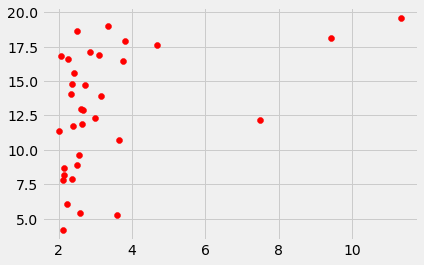

slope = 0.8615230331626541  intercept = 9.957463027753425  r_value = 0.40376438121365704  p_value = 0.01788045971583602  stderr = 0.34508014140491694


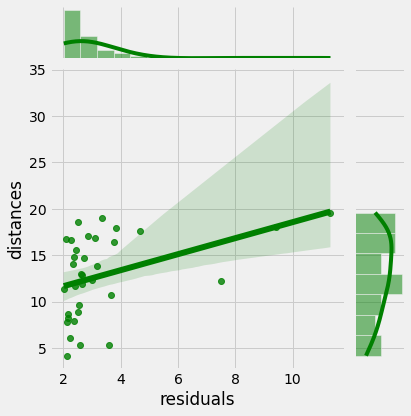

In [20]:
#I uploaded the file on jupyter 
data=np.load("residuals_261.npy",allow_pickle=True).item()
data=pd.DataFrame(data)

plt.style.use('fivethirtyeight') 


print(data)
print(data.info())
print("Columns:", data.columns)

data.drop( data[ data['residuals'] < 2 ].index , inplace=True)
data=data[data['residuals']>2] 
print(data)
x = data.residuals
y = data.distances


#ploting the orginal data
plt.scatter(x,y, color="r", marker="o", label="first_data")
plt.show()






#regression:
slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
print("slope =",slope," intercept =",intercept," r_value =",r_value," p_value =",p_value," stderr =",stderr)




#seaborn
sns.jointplot(data=data, x="residuals", y="distances",color = 'g', kind="reg")




